# Spectrogram of the .mp3 files

In [13]:
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
audio_path = '/Users/gioelepozzi/Desktop/PMEmo/code/spectrogram/data/1.mp3'

x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 706176
Audio Length: 32.02612244897959 s


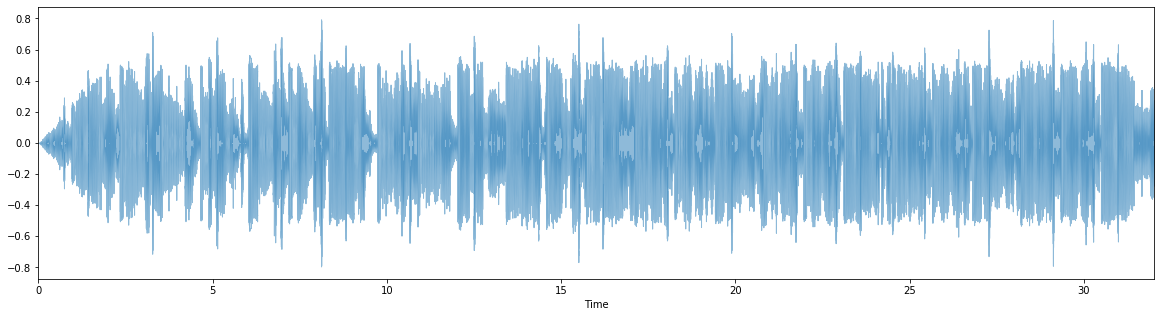

In [19]:
# audio specs

print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(x)))
secs=np.size(x)/sr
print('Audio Length: '+str(secs)+' s')
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.5)

In [32]:
X = librosa.stft(x)
print('This STFT has',X.shape[0],'frequency bins and',X.shape[1],'frames in time.')

# log amplitude
XdB = librosa.amplitude_to_db(abs(X))

This STFT has 1025 frequency bins and 1380 frames in time.


### spectrogram with librosa (~320 ms)

CPU times: user 320 ms, sys: 27.9 ms, total: 348 ms
Wall time: 220 ms


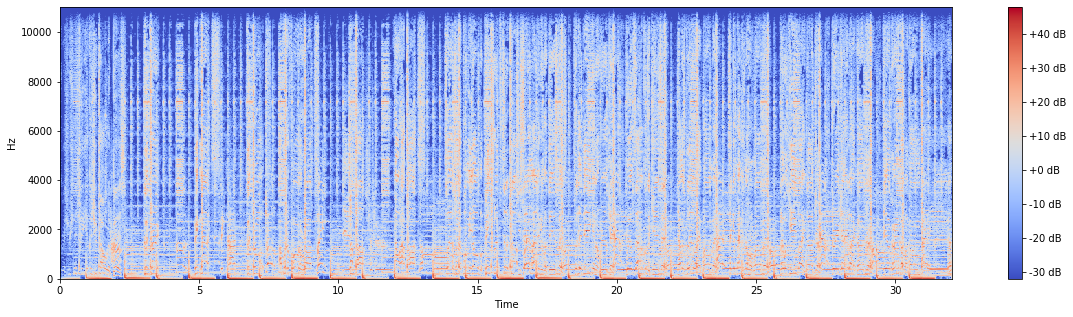

In [67]:
%%time
plt.figure(figsize=(20, 5))
librosa.display.specshow(XdB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')

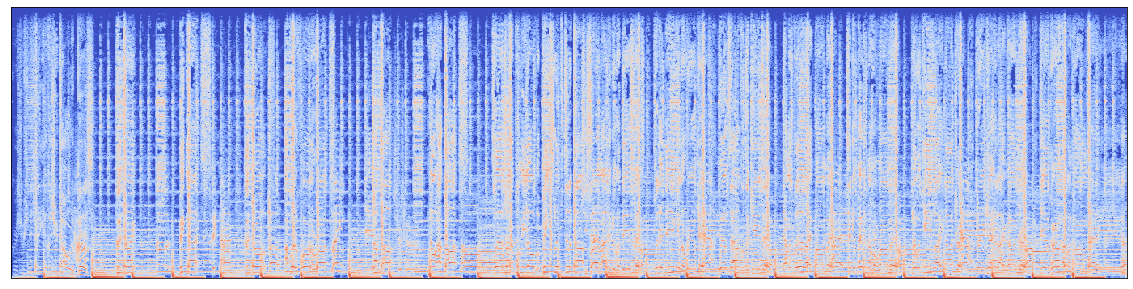

In [72]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(XdB, sr=sr)
plt.savefig('1.png', bbox_inches='tight')

### spectrogram with matplotlib.pyplot.spectrogram (~150 ms)

CPU times: user 145 ms, sys: 23 ms, total: 168 ms
Wall time: 107 ms


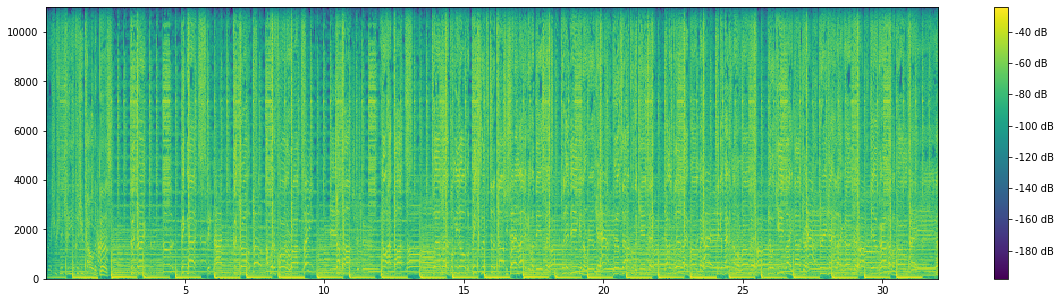

In [73]:
%%time
plt.figure(figsize=(20, 5))
plt.specgram(x, NFFT=X.shape[0], Fs=sr)
plt.colorbar(format='%+2.0f dB')

# Function to create spectrogram and save in a .png

In [99]:
from natsort import natsorted
import os

def spectrogram(audio_path):
    for mp3_file in natsorted(os.listdir(audio_path)):
        file_name = os.path.basename(mp3_file)
        music_ID = file_name.split('.')[0]
        print('filename',file_name,'music_ID',music_ID)
        x, sr = librosa.load(audio_path + '/'+ file_name)
        X = librosa.stft(x)
        plt.specgram(x, NFFT=X.shape[0], Fs=sr)
        plt.savefig(music_ID + '.png', bbox_inches='tight')
    

filename 1.mp3 music_ID 1
filename 4.mp3 music_ID 4
filename 5.mp3 music_ID 5
filename .DS_Store music_ID 


NoBackendError: 

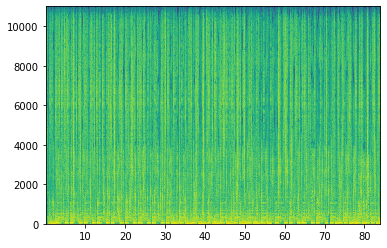

In [100]:
spectrogram('/Users/gioelepozzi/Desktop/PMEmo/code/spectrogram/data')